<a href="https://colab.research.google.com/github/KAMBAPUanuhya-19/Iris-Flower-Classification/blob/main/Task_4_Sales_Prediction_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING DATASET

In [ ]:
sales_data=pd.read_csv('/content/advertising.csv')
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


DATA ANALYSIS

In [ ]:
sales_data.shape

(200, 4)

In [ ]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

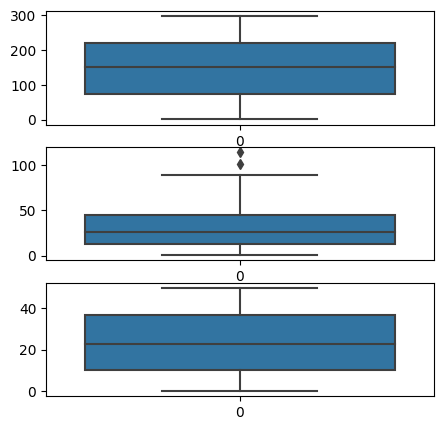

In [6]:
fig,axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(sales_data['TV'],ax=axs[0])
plt2=sns.boxplot(sales_data['Newspaper'],ax=axs[1])
plt3=sns.boxplot(sales_data['Radio'],ax=axs[2])


<Axes: xlabel='Newspaper', ylabel='Density'>

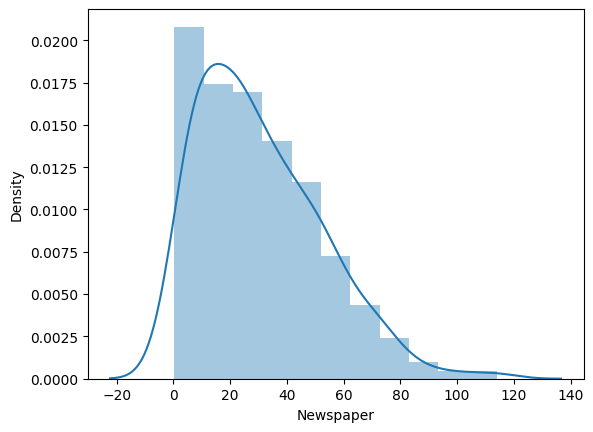

In [7]:
sns.distplot(sales_data['Newspaper'])

In [8]:
iqr=sales_data.Newspaper.quantile(0.75)-sales_data.Newspaper.quantile(0.25)

In [9]:
lower_bridge=sales_data["Newspaper"].quantile(0.25)-(iqr*1.5)
upper_bridge=sales_data["Newspaper"].quantile(0.75)-(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
-3.4250000000000043


In [10]:
data=sales_data.copy()

In [11]:
data.loc[data['Newspaper']>=93,'Newspaper']=93

<Axes: >

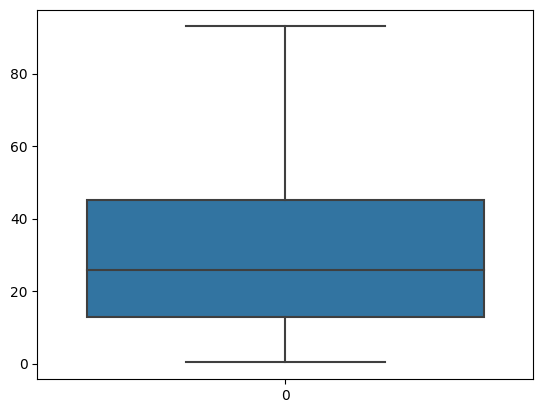

In [12]:
sns.boxplot(data['Newspaper'])

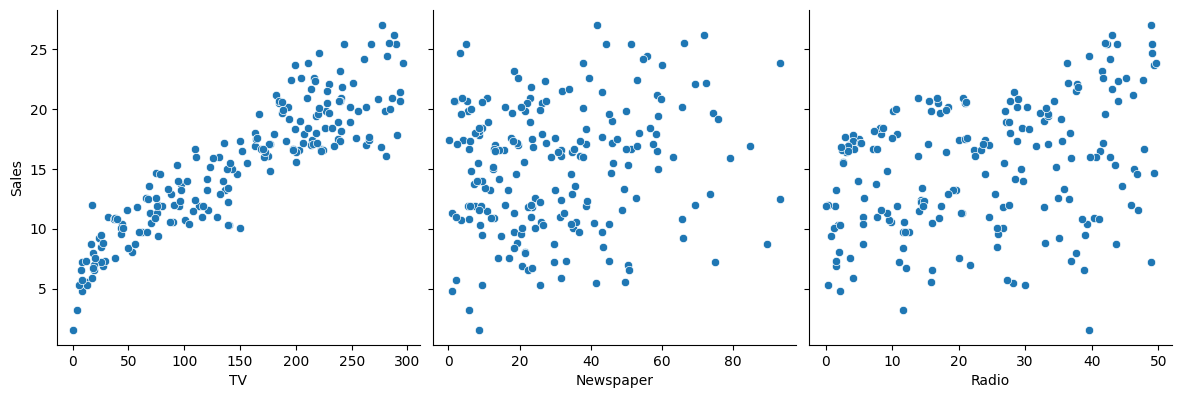

In [13]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],
             y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

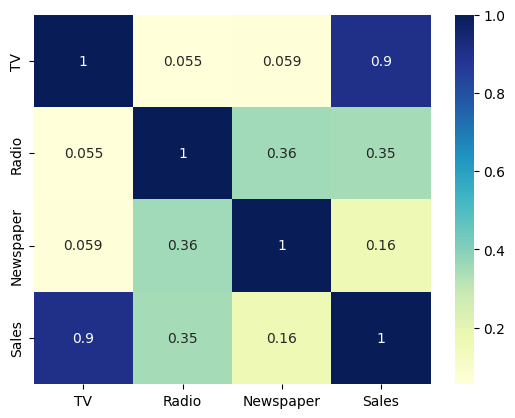

In [14]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [15]:
important_features=list(sales_data.corr()['Sales'][(sales_data.corr()['Sales']>+0.5)|(sales_data.corr()['Sales']<-0.5)].index)

In [16]:
print(important_features)

['TV', 'Sales']


In [17]:
x=data['TV']
y=data['Sales']

In [18]:
x=x.values.reshape(-1,1)

In [19]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [20]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [21]:
print(x.shape,y.shape)


(200, 1) (200,)


SPLITTING THE DATA

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [23]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [24]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [25]:
knn=KNeighborsRegressor().fit(x_train,y_train)
knn

KNeighborsRegressor()

In [26]:
knn_train_pred=knn.predict(x_train)

In [27]:
knn_test_pred=knn.predict(x_test)

In [28]:
print(knn_train_pred,knn_test_pred)

[ 9.48 20.06 17.34 18.18 13.04 14.5  10.78 20.06  6.06 16.22 20.98 18.34
 12.38 13.04 12.72 21.9  20.32 18.18 20.32  5.64 19.54 13.62 20.98 20.98
 12.72 13.18  5.64 22.2   8.32  9.02 16.6  19.02 16.22 13.4  11.44 19.9
 11.44  8.24 20.06  8.26 19.54 22.   12.02 13.18 11.44  8.24 20.32 10.78
 21.3   5.64 11.44 18.18 16.52 18.28  8.64  8.32 20.98  7.5  21.98 21.86
 12.02 12.8  19.88 16.62 13.04 14.26 13.04 16.6  12.56 13.18 18.18 19.76
 12.02  8.24 18.78 20.98 23.72  8.32 20.06  5.64  9.92 14.06 19.02 19.22
 21.9  22.24 18.38 20.06  8.32 11.96 19.74 17.34 19.02 18.78 19.74 15.2
  8.64 19.04 12.02 16.9  11.96 17.34 17.34  7.5  13.18  9.48 11.44 12.48
 10.26 20.22  8.64 12.48 21.92 21.86 14.02 21.88  9.48 10.78 21.86 19.84
 14.26 19.68  9.92  8.64 18.18 20.22 21.3  13.1  12.4  21.96 21.98 19.8
 11.44 12.4 ] [18.18 11.84  8.26 21.88  5.64 13.18 12.2  14.36 12.72 10.26 12.04 10.78
 12.8   8.24 20.98 17.14 12.74 21.86 12.56 17.3  12.8  20.32 14.5  17.24
 12.02 20.32 16.52 20.38 19.54 20.32 10.

In [29]:
Results=pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [30]:
r2=r2_score(y_test,knn_test_pred)
r2_train=r2_score(y_train,knn_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance=r2_train - r2
Results=Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.8110486036227706
RMSE: 2.2279070216168577


In [31]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.857164,0.811049,2.227907,0.046115


In [32]:
svr=SVR().fit(x_train,y_train)
svr

SVR()

In [33]:
svr_train_pred=svr.predict(x_train)
svr_test_pred=svr.predict(x_test)

In [34]:
print(svr_train_pred,svr_test_pred)

[ 8.92686738 19.91387206 16.24184693 18.12151335 14.16494488 15.5097725
  9.36468187 19.9222543   8.11500495 16.89398522 20.30944787 17.21013825
 13.81655501 14.03743117 12.86450727 19.96559818 19.13353009 18.12151335
 19.21557774  8.09217873 17.59538756 14.9002937  20.30029373 20.29250714
 12.88036954 14.97132961  8.05327028 20.01878857  8.32616436  8.78381218
 16.99946163 19.84397529 16.92729607 13.66371085 11.61667726 19.10277436
 11.60443823  8.40000813 19.9222543   8.69994312 17.43641991 20.21068477
 11.04087268 14.98150411 11.4998516   8.40708848 19.13790093  9.27840477
 19.44046782  8.10981962 11.62890223 18.20000759 16.68313401 18.37537622
  8.64626477  8.34884761 20.31047499  8.20912234 20.25414829 19.99303187
 11.32555141 13.50981336 19.06282624 16.6221874  14.02272129 14.71904397
 14.06194731 16.99946163 12.49667566 14.96624487 18.18957937 19.04492781
 11.18700221  8.37913042 18.59632995 20.3087476  20.15322245  8.32616436
 19.8997247   8.09992933 10.48746588 14.47517639 19.

In [35]:
r2=r2_score(y_test,svr_test_pred)
r2_train=r2_score(y_train,svr_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance=r2_train - r2
Results=Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.7865459174617466
RMSE: 2.3679593468826745


In [36]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.857164,0.811049,2.227907,0.046115
1,Support Vector Machine,0.811289,0.786546,2.367959,0.024743


In [37]:
import statsmodels.api as sm

In [38]:
x_train_constant = sm.add_constant(x_train)

In [39]:
model=sm.OLS(y_train,x_train_constant).fit()

In [40]:
model.params

const    7.031406
x1       0.055639
dtype: float64

In [41]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     615.0
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.59e-51
Time:                        13:54:53   Log-Likelihood:                -298.43
No. Observations:                 134   AIC:                             600.9
Df Residuals:                     132   BIC:                             606.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0314      0.384     18.308      0.0

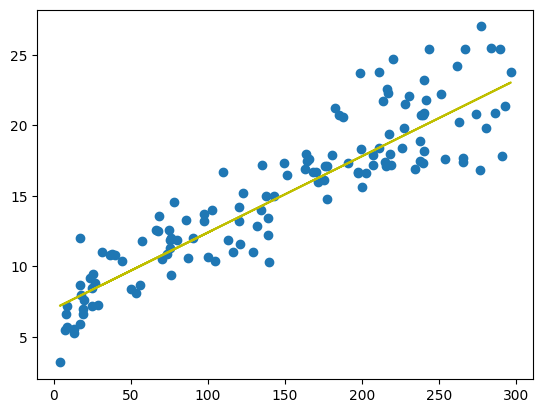

In [42]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9955+0.0541*x_train,'y')
plt.show()

In [43]:
y_train_pred=model.predict(x_train_constant)
res=(y_train-y_train_pred)
res

66     2.215976
81    -3.073558
95     0.782800
96    -1.325606
123    1.319474
         ...   
137   -1.459709
178   -5.626625
59    -0.354473
86     0.723364
63     1.254503
Name: Sales, Length: 134, dtype: float64

In [44]:
y_train_pred

array([ 8.78402382, 20.37355788, 16.11719996, 18.02560619, 13.8805256 ,
       15.3605141 ,  9.22913314, 20.39024948,  7.51546224, 16.77373621,
       21.80903545, 17.0908766 , 13.48549107, 13.73586506, 12.43948415,
       20.47927134, 19.18289043, 18.02560619, 19.2886039 ,  7.43756811,
       17.48034726, 14.70397785, 21.64768332, 21.56978919, 12.45617575,
       14.78187198,  7.25952438, 23.1499273 ,  7.9883909 ,  8.62267169,
       16.87944968, 20.24002508, 16.80711941, 13.31301121, 11.22099738,
       19.14394337, 11.20986964,  8.11079596, 20.39024948,  8.52252209,
       17.31899513, 22.62135997, 10.70912165, 14.79299971, 11.11528391,
        8.1219237 , 19.1884543 ,  9.14567515, 19.59461656,  7.49877064,
       11.23212511, 18.10906419, 16.56230928, 18.29823565,  8.45575569,
        8.02733797, 21.88136572,  7.76027237, 22.43775238, 23.20556596,
       10.95949565, 13.14053134, 19.09386857, 16.50110675, 13.71917346,
       14.50367865, 13.7636844 , 16.87944968, 12.06114123, 14.77

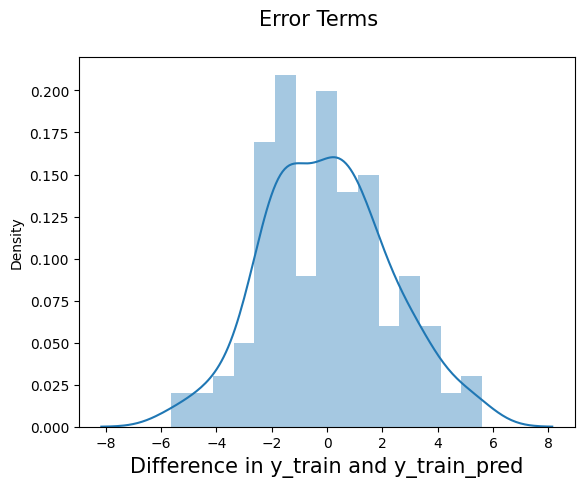

In [45]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize=15)
plt.show()

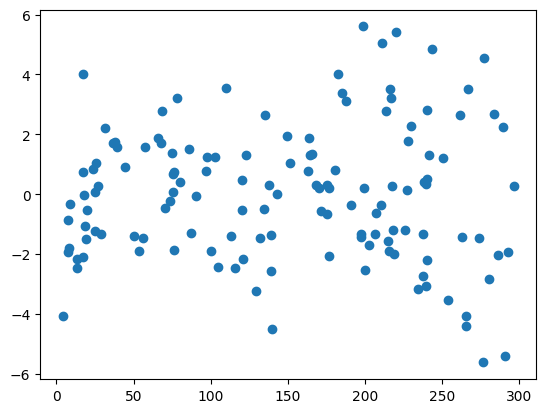

In [46]:
plt.scatter(x_train,res)
plt.show()

In [47]:
x_test_constant=sm.add_constant(x_test)
y_pred=model.predict(x_test_constant)

In [48]:
y_pred

array([18.14801125, 10.49769472,  8.56146916, 22.8494785 ,  7.07035292,
       14.89314931, 11.94430003, 14.60939212, 12.35602616,  9.51845421,
       12.25587656,  9.15680288, 13.14053134,  8.0718489 , 21.65881106,
       18.43733231, 13.00699854, 23.36691809, 12.02219416, 16.31193529,
       13.19060614, 19.29973163, 15.36607797, 15.7444209 , 10.88160152,
       19.49446696, 16.62907568, 21.24152106, 19.4054451 , 19.26078457,
       10.34747032, 19.4054451 , 17.48591113, 10.87047378, 14.02518613,
       10.75363258, 12.27256816,  9.7187534 ,  7.68237824,  7.33185465,
       17.78079606, 11.28219991, 14.83751064, 17.90320112, 17.31899513,
        7.50989838, 20.8520504 , 11.18761418, 20.87430587, 23.0330861 ,
       19.80047962, 18.38725752, 17.80861539, 14.32563492, 18.90469711,
       22.68812637,  9.42386847, 18.69327018, 19.94514015, 22.64917931,
       15.2269813 , 12.38384549, 19.73371322, 17.51373046,  9.42943234,
       13.55225747])

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [50]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.3686749740397914

In [51]:
r2=r2_score(y_test,y_pred)
r2

0.7864168809388138

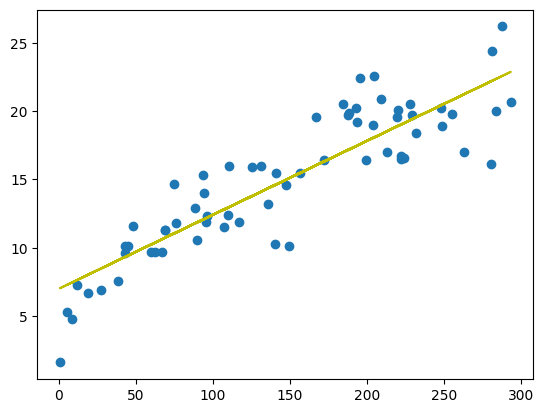

In [52]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9955+0.0541*x_test,'y')
plt.show()